In [93]:
# Kaggle Titanic Competition - Machine Learning from Disaster (https://www.kaggle.com/c/titanic)
# !unzip titanic.zip

In [94]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns


In [95]:
# Importing the dataset

data = pd.read_csv('train.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

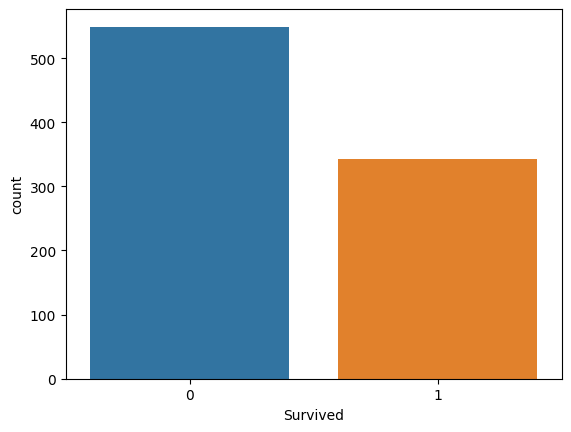

In [96]:
# Data Exploration and Visualization 
sns.countplot(x='Survived', data=data)

<Axes: xlabel='Survived', ylabel='count'>

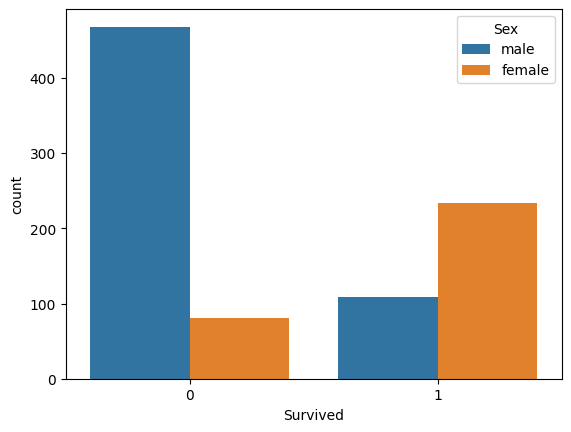

In [97]:
# Survival Rates Between Genders
sns.countplot(x='Survived', hue='Sex', data=data)

<Axes: xlabel='Survived', ylabel='count'>

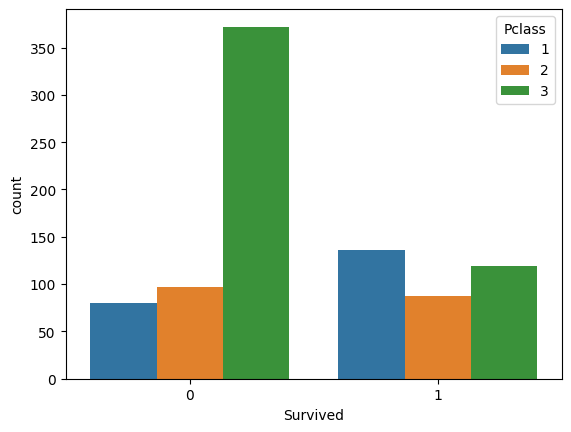

In [98]:
# Survival Rates Between Passenger Classes
sns.countplot(x='Survived', hue='Pclass', data=data)

<Axes: ylabel='Frequency'>

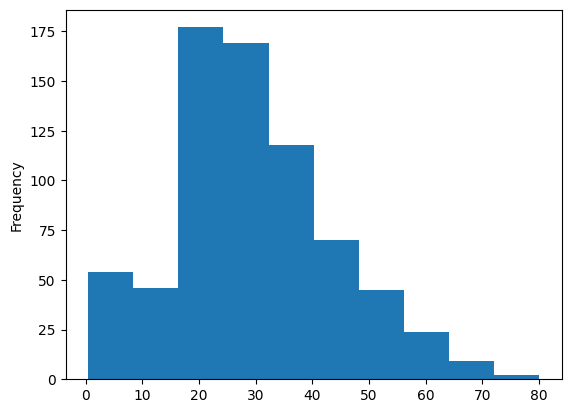

In [99]:
# Age Distribution
data['Age'].plot.hist()

<Axes: ylabel='Frequency'>

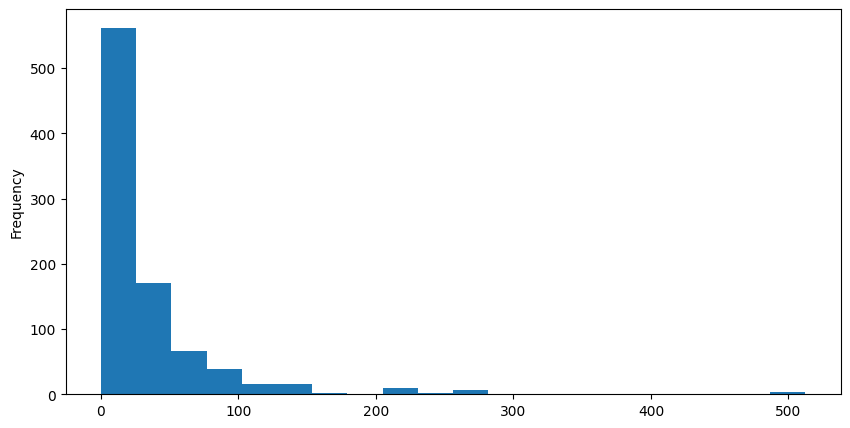

In [100]:
# Ticket Fare Distribution
data['Fare'].plot.hist(bins=20, figsize=(10,5))

In [101]:
# Removing Null Data From Our Data Set
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

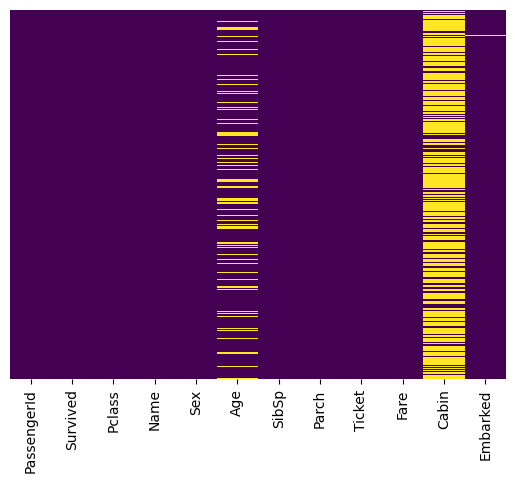

In [102]:
# Heatmap of Null Data
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

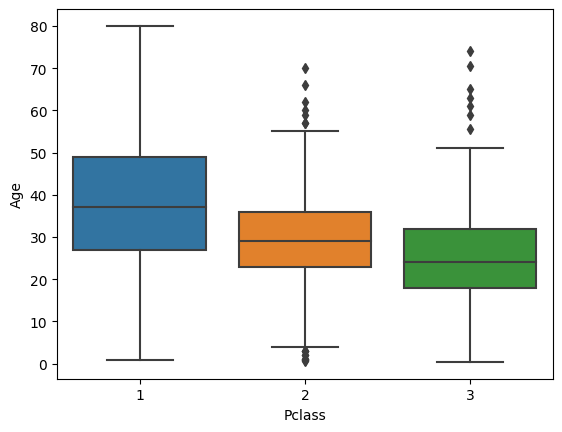

In [103]:
# Boxplot of Age and Passenger Class
sns.boxplot(x='Pclass', y='Age', data=data)

In [104]:
# Age Imputation
#Pclass value 1

data[data['Pclass'] == 1]['Age'].mean()

#Pclass value 2

data[data['Pclass'] == 2]['Age'].mean()

#Pclass 3

data[data['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [105]:
# Imputing Age Values
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return data[data['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return data[data['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return data[data['Pclass'] == 3]['Age'].mean()

        

    else:

        return age

In [106]:
# Applying Imputation
data['Age'] = data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)


<Axes: >

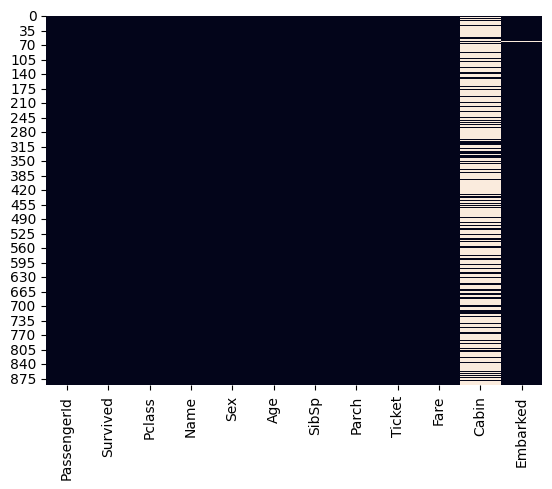

In [107]:
# Heatmap of Null Data
sns.heatmap(data.isnull(), cbar=False)


In [108]:
# Dropping Cabin Column
data.drop('Cabin', axis=1, inplace=True)

In [109]:
# dropping remaining null values
data.dropna(inplace = True)

<Axes: >

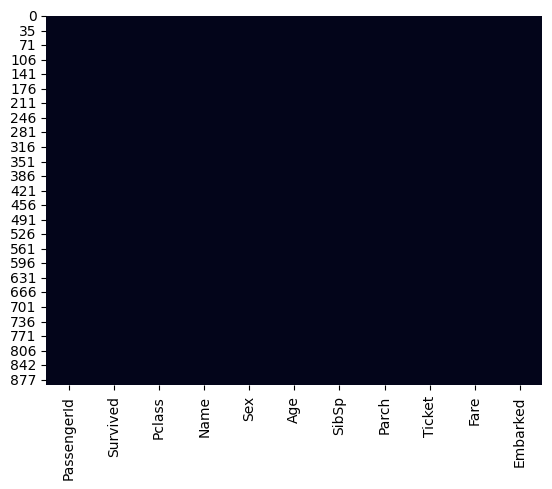

In [110]:
# Heatmap of Null Data
sns.heatmap(data.isnull(), cbar=False)

In [111]:
# Converting Categorical Features

pd.get_dummies(data['Sex'])


,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [112]:
# dropping unnecessary columns
pd.get_dummies(data['Sex'], drop_first = True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [113]:
# create dummy variable columns for our Sex and Embarked columns
sex_data = pd.get_dummies(data['Sex'], drop_first = True)

embarked_data = pd.get_dummies(data['Embarked'], drop_first = True)

In [114]:
# Adding Dummy Variables to the pandas DataFrame
data = pd.concat([data, sex_data, embarked_data], axis = 1)


In [115]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')


In [116]:
# removing unnecessary columns
data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)


In [117]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')


In [118]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis = 1)

y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [119]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Fit and transform the scaler on numerical features
numerical_features = ['Age', 'Fare']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [120]:
# Training the Logistic Regression Model on the Training Set
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFECV

# Create a logistic regression model
logmodel = LogisticRegression()

# Create an RFECV instance
selector = RFECV(estimator=logmodel, step=1, cv=5)

# Fit the selector on training data
selector = selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]

# Update X_train and X_test with selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]




# Predicting the Test set results



/home/mohamedismail/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mohamedismail/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [121]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

In [122]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [123]:
# Evaluating the Model
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.88      0.88       171
           1       0.79      0.80      0.79        96

    accuracy                           0.85       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267



In [124]:
confusion_matrix(y_test, y_pred)

array([[150,  21],
       [ 19,  77]])

In [125]:
print(accuracy_score(y_test, y_pred))

0.850187265917603


In [126]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Initialize different models
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
support_vector_machine = SVC()

# Fit the models on training data
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
support_vector_machine.fit(X_train, y_train)

# Make predictions
rf_predictions = random_forest.predict(X_test)
gb_predictions = gradient_boosting.predict(X_test)
svm_predictions = support_vector_machine.predict(X_test)

# Evaluate models using accuracy_score

print(classification_report(y_test, rf_predictions))

print(classification_report(y_test, gb_predictions))

print(classification_report(y_test, svm_predictions))

# Initialize a dictionary to store accuracies of all models
accuracies = dict()

# Calculate accuracy of random_forest
accuracies['random_forest'] = accuracy_score(y_test, rf_predictions)

# Calculate accuracy of gradient_boosting
accuracies['gradient_boosting'] = accuracy_score(y_test, gb_predictions)

# Calculate accuracy of support_vector_machine
accuracies['support_vector_machine'] = accuracy_score(y_test, svm_predictions)

# Print out the accuracies
print(accuracies)


              precision    recall  f1-score   support

           0       0.89      0.82      0.86       171
           1       0.72      0.82      0.77        96

    accuracy                           0.82       267
   macro avg       0.81      0.82      0.81       267
weighted avg       0.83      0.82      0.83       267

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       171
           1       0.84      0.79      0.81        96

    accuracy                           0.87       267
   macro avg       0.86      0.85      0.86       267
weighted avg       0.87      0.87      0.87       267

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       171
           1       0.80      0.81      0.81        96

    accuracy                           0.86       267
   macro avg       0.85      0.85      0.85       267
weighted avg       0.86      0.86      0.86       267

{'random_forest': 0

In [127]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier
voting_classifier = VotingClassifier(
    estimators=[('rf', random_forest), ('gb', gradient_boosting), ('svm', support_vector_machine)],
    voting='hard'
)

# Fit the voting classifier on training data
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)

# Evaluate the ensemble model
print("Ensemble Model Accuracy:", accuracy_score(y_test, voting_predictions))


Ensemble Model Accuracy: 0.8576779026217228


In [162]:
# Load and preprocess the test data
test_data = pd.read_csv('test.csv')

# Apply the same preprocessing steps as you did for the training data
test_data['Age'] = test_data[['Age', 'Pclass']].apply(impute_missing_age, axis=1)
test_data.drop('Cabin', axis=1, inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
sex_test_data = pd.get_dummies(test_data['Sex'], drop_first=True)
embarked_test_data = pd.get_dummies(test_data['Embarked'], drop_first=True)
test_data = pd.concat([test_data, sex_test_data, embarked_test_data], axis=1)
test_data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)

# Scale numerical features
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Select the same features used for training
test_data_selected = test_data[selected_features]

# Make predictions on the test data
test_predictions = voting_classifier.predict(test_data_selected)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],  # Include the PassengerId column
    'Survived': test_predictions
})

# Save the submission DataFrame as a CSV file
submission_df.to_csv('titanic_submission.csv', index=False)
